<a href="https://colab.research.google.com/github/JhonnyLimachi/IA_en_Salud/blob/main/3_Como_evaluar_un_Modelo_de_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Como evaluar un modelo de *Machine Learning*

Ahora que, has construido tu modelo de *Machine Learning*. Después de varias horas haciendo un análisis exploratorio y limpiando los datos, lo has entrenado con tu conjunto de datos y has obtenido los coeficientes "ideales". ¿Cuál es el próximo paso?


> "No controlas aquello que no puedes medir."


<center><img width="50%" src="https://images.unsplash.com/photo-1501516069922-a9982bd6f3bd?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1050&q=80"></center>


En realidad, medir resultados y monitorear indicadores no es algo exclusivo de los sistemas militares, sino que es una tarea obligatoria en cualquier actividad, y más aún en modelos de Inteligencia Artificial.

Si no sabes cómo está desempeñándose tu algoritmo, puedes terminar comprometiendo los ingresos de una empresa o incluso su imagen.

Existen innumerables metodologías, métricas e investigaciones sobre esta etapa de evaluación. Cada día, la frontera de la ciencia avanza un paso. Lo que ayer era el estado del arte, probablemente no lo será en un mes.

Quiero presentar aquí una visión general de las métricas más conocidas y utilizadas por la comunidad.


## Evaluación de Modelos de Regresión

Los Modelos de Regresión buscan prever un valor numérico continuo. Por ejemplo, cuál será el precio de venta de un inmueble o cuál será la facturación esperada para el próximo mes.

Cuando estamos usando el *dataset* de test, fazemos a previsão $\hat{y}_i$ para la $i\text{-ésima}$ linha, una vez que tenemos el valor real $y_i$, podemos calcular este error de diferentes formas.

<center><img width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/regressao_loss.png"></center>


En la imagen anterior, considere que la línea representa su modelo de regresión, es decir, la propia predicción. Cada flecha (vector) representa la diferencia entre el valor real y la predicción.

Em outras palavras, cada seta representa o quanto você errou naquela previsão específica. Se você medir todas as distâncias entre os pontos e a reta (que é o seu modelo), você vai ter o seu erro, ou ***loss***.

En el ejemplo de esta figura, queda claro que el modelo del gráfico de la izquierda "falla" mucho más que el modelo del gráfico de la derecha. Es decir, el modelo de la derecha es mejor.

De hecho, existen diversas métricas que pueden utilizarse para verificar el desempeño de su modelo. Vamos a echar un vistazo a las principales.

### *Mean Absolut Error* - MAE

Es el más simple de todos, donde se calcula la media de la magnitud del error para todos los puntos donde realizamos predicciones, sin considerar la dirección.

$$MAE = \frac{1}{m}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$

Es la más intuitiva de todas las métricas, ya que observamos la diferencia absoluta entre la predicción y el valor real.

El problema con el MAE es que todos los errores individuales se tratan de la misma manera, lo cual puede ser un problema al manejar valores atípicos.

### *Mean Squared Error* - MSE

El MSE calcula a média de los errores elevados a la segunda potencia.

$$MSE = \frac{1}{m}\sum_{i=1}^{m}(y_i - \hat{y}_i)^2$$

La ventaja es que los errores más grandes serán penalizados más que los menores, lo que implica que las diferencias menores tendrán menos impacto en la evaluación.

Puede haber una dificultad en su interpretación, ya que la unidad de medida será alterada.

### *Root Mean Squared Error* - RMSE

Calcular la raíz cuadrada de la media de los cuadrados de los errores hace que el RMSE penalice los errores más grandes, siendo más sensible a los valores atípicos.

$$RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(y_i - \hat{y}_i)^2}$$

Note que las diferencias se elevan al cuadrado antes de que se calcule su media.

Esta métrica es muy deseada en situaciones donde se desea evitar grandes errores al máximo.

### *R-Squared* - $R^2$

Aunque el R-Squared no se trata propiamente de errores, es bastante popular para verificar la precisión de los modelos de regresión.

$$R^2 = 1 - \frac{\sum_{j=1}^{m}(y_i - \hat{y}_i)^2}{\sum_{j=1}^{m}(y_i - \bar{y}_i)^2}$$

Puedes entender la métrica como "qué tan bueno es tu modelo en comparación con los valores reales", y lo hace calculando las varianzas en relación a la media y a la línea recta.


## Evaluación de Modelos de Clasificación

¿Cómo se evalúa un modelo de clasificación?

Ya sea trabajando con clasificación binaria o con múltiples clases, las métricas relacionadas con los modelos de clasificación no pueden ser las mismas que usamos en modelos de regresión.


### Precisión

Definitivamente, es la métrica más intuitiva y fácil de entender. La precisión muestra directamente el porcentaje de aciertos de nuestro modelo.

$$
\text{Acurácia} = \frac{\text{Número de previsões corretas}}{\text{Número total de previsões}}
$$

A pesar de ser muy directa e intuitiva, la precisión no es una buena métrica cuando se trata, por ejemplo, de datos desbalanceados.

En un *dataset* de fraudes bancarios, el número de eventos clasificados como fraude puede ser inferior al 1%. Es decir, la precisión del modelo será superior para los casos de no-fraude y no reflejará bien la naturaleza de nuestro problema.

En este ejemplo de fraude bancario, el banco preferirá una precisión máxima en la detección de casos confirmados de fraudes, aunque esto implique disminuir la precisión global y tener un mayor número de falsos positivos.

Veamos un ejemplo del curso Machine Learning Crash Course de Google. En él, se puede ver cómo observar simplemente la precisión puede llevar a conclusiones erróneas. A continuación, estamos viendo los resultados de un modelo para la detección de tumores malignos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/acuracia.png"></center>

Una precisión del 91% podría dar lugar a una interpretación errónea, ya que el modelo sólo fue capaz de detectar correctamente 1 de los 9 tumores malignos. En casos como este, con datos desequilibrados, lo ideal es separar los errores en distintos tipos, y no limitarse a utilizar una métrica de precisión global.


**Tipos de errores**

**Verdadero positivo (*true positive* — TP):** Por ejemplo, cuando el paciente tiene un tumor maligno y el modelo lo clasifica como teniendo un tumor maligno.

**Falso positivo (false positive — FP):** Por ejemplo, cuando el paciente no tiene un tumor maligno y el modelo lo clasifica como teniendo un tumor maligno.

**Falso negativo (false negative — FN):** Por ejemplo, cuando el paciente tiene un tumor maligno y el modelo lo clasifica como no teniendo un tumor maligno.

**Verdadero negativo (true negative — TN):** Por ejemplo, cuando el paciente no tiene un tumor maligno y el modelo lo clasifica como no teniendo un tumor maligno.

Con estos conceptos, vamos a echar un vistazo a dos otras métricas.

### Precision

La precisión se refiere a la cantidad (proporcional) de identificaciones positivas hechas correctamente, y se obtiene mediante la siguiente ecuación:

$$
\frac{TP}{TP+FP}
$$

Ella responde **"¿cuál es la proporción de identificaciones positivas que estaban correctas?"** Este valor será máximo (1.0) cuando no se produzcan falsos negativos.

En el ejemplo del tumor maligno, la precisión sería del 50%, lo que significa que cuando el modelo predice un tumor maligno, está en lo correcto la mitad de las veces.

### *Recall*

Muestra la proporción de positivos encontrados correctamente. Matemáticamente, se puede calcular el *recall* de la siguiente manera:

$$
\frac{TP}{TP+FN}
$$

En el caso del tumor maligno, el recall tendría un valor igual al 11%, lo que significa que el modelo es capaz de predecir correctamente solo el 11% de todos los tumores malignos.

### *F1-score*

É a média harmonica entre precisão e *recall*. O melhor valor possível para 0 *F1-score* é 1 e o pior é 0. É calculado por

$$
2* \frac{precision*recall}{precision+recall}
$$

### Matriz de Confusão

Uma das principais maneiras de você verificar o desempenho do seu algoritmo é por meio da Matriz de Confusão. Para cada classe, ela informa quais os valores reais (*actual*) e os valores previstos pelo modelo (*predicted*).

Dessa maneira, é possível rapidamente identificar:

<p align=center><img src="https://plat.ai/wp-content/uploads/Table1-2.png." width="80%"></p>


Desse sumário da matriz de confusão, conseguimos extrair várias informações importantes.

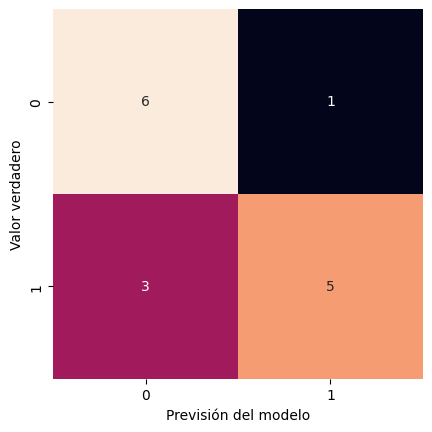

In [3]:
# problema binário de clasificación
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_true = [0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]

mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Previsión del modelo')
plt.ylabel('Valor verdadero');